In [1]:
#This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '038782cd-6269-4034-8a1a-ceeec48d01f4',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-06-22T10:12:55.850Z', 'error_code': 0, 'error_message': None, 'elapsed': 882, 'credit_count': 1, 'notice': None, 'total_count': 10119}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11132, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'pa

In [2]:
type(data)

dict

In [3]:
import pandas as pd
#to ee all column use this option
pd.set_option('display.max_columns',None)


In [5]:
df=pd.DataFrame()

In [6]:
df

Empty DataFrame
Columns: []
Index: []

In [85]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'20',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '038782cd-6269-4034-8a1a-ceeec48d01f4',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
        
    #make it prettier and create dataframe
    df=pd.json_normalize(data['data'])
    #add column timestamp
    df['timestamp']=pd.to_datetime('now')
    df
    #save csv
    if not os.path.isfile(r'C:\Users\houss\OneDrive\Bureau\data_analysis_api_project\API\api.csv'):
        df.to_csv(r'C:\Users\houss\OneDrive\Bureau\data_analysis_api_project\API\api.csv', header ='column_names')
    else:
        df.to_csv(r'C:\Users\houss\OneDrive\Bureau\data_analysis_api_project\API\api.csv', mode='a',header =False)

In [86]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60)
exit()

{'status': {'timestamp': '2024-06-22T11:27:49.440Z', 'error_code': 0, 'error_message': None, 'elapsed': 23, 'credit_count': 1, 'notice': None, 'total_count': 10119}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11132, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

KeyboardInterrupt: 

In [87]:
df

id           name symbol           slug  num_market_pairs  \
0       1        Bitcoin    BTC        bitcoin             11132   
1    1027       Ethereum    ETH       ethereum              9079   
2     825    Tether USDt   USDT         tether             89323   
3    1839            BNB    BNB            bnb              2186   
4    5426         Solana    SOL         solana               690   
5    3408           USDC   USDC       usd-coin             19846   
6      52            XRP    XRP            xrp              1342   
7   11419        Toncoin    TON        toncoin               430   
8      74       Dogecoin   DOGE       dogecoin              1009   
9    2010        Cardano    ADA        cardano              1197   
10   5994      Shiba Inu   SHIB      shiba-inu               834   
11   1958           TRON    TRX           tron               993   
12   5805      Avalanche   AVAX      avalanche               747   
13   6636       Polkadot    DOT   polkadot-new               784   
14   1975      Chainlink   LINK      chainlink              1796   
15   1831   Bitcoin Cash    BCH   bitcoin-cash               896   
16   7083        Uniswap    UNI        uniswap              1047   
17   6535  NEAR Protocol   NEAR  near-protocol               422   
18   3890        Polygon  MATIC        polygon              1406   
19      2       Litecoin    LTC       litecoin              1203   

                  date_added  \
0   2010-07-13T00:00:00.000Z   
1   2015-08-07T00:00:00.000Z   
2   2015-02-25T00:00:00.000Z   
3   2017-07-25T00:00:00.000Z   
4   2020-04-10T00:00:00.000Z   
5   2018-10-08T00:00:00.000Z   
6   2013-08-04T00:00:00.000Z   
7   2021-08-26T13:40:22.000Z   
8   2013-12-15T00:00:00.000Z   
9   2017-10-01T00:00:00.000Z   
10  2020-08-01T00:00:00.000Z   
11  2017-09-13T00:00:00.000Z   
12  2020-07-13T00:00:00.000Z   
13  2020-08-19T00:00:00.000Z   
14  2017-09-20T00:00:00.000Z   
15  2017-07-23T00:00:00.000Z   
16  2020-09-17T00:00:00.000Z   
17  2020-08-11T00:00:00.000Z   
18  2019-04-28T00:00:00.000Z   
19  2013-04-28T00:00:00.000Z   

                                                 tags         max_supply  \
0   [mineable, pow, sha-256, store-of-value, state...     21000000.00000   
1   [pos, smart-contracts, ethereum-ecosystem, coi...                NaN   
2   [stablecoin, asset-backed-stablecoin, avalanch...                NaN   
3   [marketplace, centralized-exchange, payments, ...                NaN   
4   [pos, platform, solana-ecosystem, cms-holdings...                NaN   
5   [medium-of-exchange, stablecoin, asset-backed-...                NaN   
6   [medium-of-exchange, enterprise-solutions, arr... 100000000000.00000   
7   [pos, layer-1, ftx-bankruptcy-estate, dwf-labs...                NaN   
8   [mineable, pow, scrypt, medium-of-exchange, me...                NaN   
9   [dpos, pos, platform, research, smart-contract...  45000000000.00000   
10      [memes, ethereum-ecosystem, doggone-doggerel]                NaN   
11  [media, payments, tron-ecosystem, layer-1, dwf...                NaN   
12  [defi, smart-contracts, three-arrows-capital-p...    715748719.00000   
13  [substrate, polkadot, binance-chain, polkadot-...                NaN   
14  [platform, defi, oracles, smart-contracts, sub...                NaN   
15  [mineable, pow, sha-256, marketplace, medium-o...     21000000.00000   
16  [decentralized-exchange-dex-token, defi, dao, ...                NaN   
17  [platform, ai-big-data, staking, coinbase-vent...                NaN   
18  [pos, platform, enterprise-solutions, zero-kno...                NaN   
19        [mineable, pow, scrypt, medium-of-exchange]     84000000.00000   

      circulating_supply          total_supply  infinite_supply  platform  \
0         19715562.00000        19715562.00000            False       NaN   
1        122275958.39094       122275958.39094             True       NaN   
2     112941691562.69630    116079124154.24519             True       NaN   


In [102]:
df_test=pd.read_csv(r'C:\Users\houss\OneDrive\Bureau\data_analysis_api_project\API\api.csv')

In [103]:
df_test.count()

Unnamed: 0                            5600
id                                    5600
name                                  5600
symbol                                5600
slug                                  5600
num_market_pairs                      5600
date_added                            5600
tags                                  5600
max_supply                            1680
circulating_supply                    5600
total_supply                          5600
infinite_supply                       5600
platform                                 0
cmc_rank                              5600
self_reported_circulating_supply       840
self_reported_market_cap               840
tvl_ratio                              280
last_updated                          5600
quote.USD.price                       5600
quote.USD.volume_24h                  5600
quote.USD.volume_change_24h           5600
quote.USD.percent_change_1h           5600
quote.USD.percent_change_24h          5600
quote.USD.p

In [104]:
df_test

Unnamed: 0    id           name symbol           slug  num_market_pairs  \
0              0     1        Bitcoin    BTC        bitcoin             11132   
1              1  1027       Ethereum    ETH       ethereum              9078   
2              2   825    Tether USDt   USDT         tether             89309   
3              3  1839            BNB    BNB            bnb              2186   
4              4  5426         Solana    SOL         solana               690   
...          ...   ...            ...    ...            ...               ...   
5595          15  1831   Bitcoin Cash    BCH   bitcoin-cash               896   
5596          16  7083        Uniswap    UNI        uniswap              1047   
5597          17  6535  NEAR Protocol   NEAR  near-protocol               422   
5598          18  3890        Polygon  MATIC        polygon              1406   
5599          19     2       Litecoin    LTC       litecoin              1203   

                    date_added  \
0     2010-07-13T00:00:00.000Z   
1     2015-08-07T00:00:00.000Z   
2     2015-02-25T00:00:00.000Z   
3     2017-07-25T00:00:00.000Z   
4     2020-04-10T00:00:00.000Z   
...                        ...   
5595  2017-07-23T00:00:00.000Z   
5596  2020-09-17T00:00:00.000Z   
5597  2020-08-11T00:00:00.000Z   
5598  2019-04-28T00:00:00.000Z   
5599  2013-04-28T00:00:00.000Z   

                                                   tags     max_supply  \
0     ['mineable', 'pow', 'sha-256', 'store-of-value... 21000000.00000   
1     ['pos', 'smart-contracts', 'ethereum-ecosystem...            NaN   
2     ['stablecoin', 'asset-backed-stablecoin', 'ava...            NaN   
3     ['marketplace', 'centralized-exchange', 'payme...            NaN   
4     ['pos', 'platform', 'solana-ecosystem', 'cms-h...            NaN   
...                                                 ...            ...   
5595  ['mineable', 'pow', 'sha-256', 'marketplace', ... 21000000.00000   
5596  ['decentralized-exchange-dex-token', 'defi', '...            NaN   
5597  ['platform', 'ai-big-data', 'staking', 'coinba...            NaN   
5598  ['pos', 'platform', 'enterprise-solutions', 'z...            NaN   
5599  ['mineable', 'pow', 'scrypt', 'medium-of-excha... 84000000.00000   

      circulating_supply       total_supply  infinite_supply  platform  \
0         19715268.00000     19715268.00000            False       NaN   
1        122276217.18385    122276217.18385             True       NaN   
2     112941691562.69733 116079124154.24620             True       NaN   
3        147566002.53657    147566002.53657            False       NaN   
4        462002743.80793    578616733.52478             True       NaN   
...                  ...                ...              ...       ...   
5595      19723262.50000     19723262.50000            False       NaN   
5596     599957294.71000   1000000000.00000            False       NaN   
5597    1090908940.00000   1196989163.00000            False       NaN   
5598    9904426498.84440  10000000000.00000            False       NaN   
5599      74672318.60750     84000000.00000            False       NaN   

      cmc_rank  self_reported_circulating_supply  self_reported_market_cap  \
0            1                               NaN                       NaN   
1            2                               NaN                       NaN   
2            3                               NaN                       NaN   
3            4                               NaN                       NaN   
4            5                               NaN                       NaN   
...        ...                               ...                       ...   
5595        16                               NaN                       NaN   
5596        17                               NaN                       NaN   
5597        18                               NaN                       NaN   
5598        19                               NaN                  

The expression lambda x: '%.5f' % x is a lambda function in Python designed to format a number x to five decimal places. Let's break down how it works.

In [105]:
pd.set_option('display.float_format',lambda x: '%.5f' % x)

In [106]:
df_test

Unnamed: 0    id           name symbol           slug  num_market_pairs  \
0              0     1        Bitcoin    BTC        bitcoin             11132   
1              1  1027       Ethereum    ETH       ethereum              9078   
2              2   825    Tether USDt   USDT         tether             89309   
3              3  1839            BNB    BNB            bnb              2186   
4              4  5426         Solana    SOL         solana               690   
...          ...   ...            ...    ...            ...               ...   
5595          15  1831   Bitcoin Cash    BCH   bitcoin-cash               896   
5596          16  7083        Uniswap    UNI        uniswap              1047   
5597          17  6535  NEAR Protocol   NEAR  near-protocol               422   
5598          18  3890        Polygon  MATIC        polygon              1406   
5599          19     2       Litecoin    LTC       litecoin              1203   

                    date_added  \
0     2010-07-13T00:00:00.000Z   
1     2015-08-07T00:00:00.000Z   
2     2015-02-25T00:00:00.000Z   
3     2017-07-25T00:00:00.000Z   
4     2020-04-10T00:00:00.000Z   
...                        ...   
5595  2017-07-23T00:00:00.000Z   
5596  2020-09-17T00:00:00.000Z   
5597  2020-08-11T00:00:00.000Z   
5598  2019-04-28T00:00:00.000Z   
5599  2013-04-28T00:00:00.000Z   

                                                   tags     max_supply  \
0     ['mineable', 'pow', 'sha-256', 'store-of-value... 21000000.00000   
1     ['pos', 'smart-contracts', 'ethereum-ecosystem...            NaN   
2     ['stablecoin', 'asset-backed-stablecoin', 'ava...            NaN   
3     ['marketplace', 'centralized-exchange', 'payme...            NaN   
4     ['pos', 'platform', 'solana-ecosystem', 'cms-h...            NaN   
...                                                 ...            ...   
5595  ['mineable', 'pow', 'sha-256', 'marketplace', ... 21000000.00000   
5596  ['decentralized-exchange-dex-token', 'defi', '...            NaN   
5597  ['platform', 'ai-big-data', 'staking', 'coinba...            NaN   
5598  ['pos', 'platform', 'enterprise-solutions', 'z...            NaN   
5599  ['mineable', 'pow', 'scrypt', 'medium-of-excha... 84000000.00000   

      circulating_supply       total_supply  infinite_supply  platform  \
0         19715268.00000     19715268.00000            False       NaN   
1        122276217.18385    122276217.18385             True       NaN   
2     112941691562.69733 116079124154.24620             True       NaN   
3        147566002.53657    147566002.53657            False       NaN   
4        462002743.80793    578616733.52478             True       NaN   
...                  ...                ...              ...       ...   
5595      19723262.50000     19723262.50000            False       NaN   
5596     599957294.71000   1000000000.00000            False       NaN   
5597    1090908940.00000   1196989163.00000            False       NaN   
5598    9904426498.84440  10000000000.00000            False       NaN   
5599      74672318.60750     84000000.00000            False       NaN   

      cmc_rank  self_reported_circulating_supply  self_reported_market_cap  \
0            1                               NaN                       NaN   
1            2                               NaN                       NaN   
2            3                               NaN                       NaN   
3            4                               NaN                       NaN   
4            5                               NaN                       NaN   
...        ...                               ...                       ...   
5595        16                               NaN                       NaN   
5596        17                               NaN                       NaN   
5597        18                               NaN                       NaN   
5598        19                               NaN                  

mean % changes group by name of crypto

In [107]:
df2=df_test.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df2

quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
name                                                                       
Bitcoin                            0.00029                       0.85226   
Ethereum                           0.00718                       0.30291   
Tether USDt                        0.00310                       0.02965   
BNB                               -0.01821                       0.64786   
Solana                            -0.02254                       2.76788   
USDC                               0.00089                       0.00796   
XRP                                0.10752                       0.29204   
Dogecoin                          -0.06063                       1.13737   
Toncoin                            0.00590                       1.52850   
Cardano                            0.40133                       1.15198   
Shiba Inu                          0.03699                       2.45854   
TRON                               0.02766                       1.31461   
Avalanche                          0.18256                      -5.42046   
Chainlink                          0.02155                      -3.70736   
Polkadot                           0.19935                       2.28107   
Bitcoin Cash                      -0.07099                       1.96714   
Uniswap                            0.06408                      -0.24534   
NEAR Protocol                     -0.34396                      -1.17176   
Polygon                            0.00333                      -0.69242   
Litecoin                           0.00775                       1.72236   

               quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
name                                                                       
Bitcoin                           -2.92699                      -5.98222   
Ethereum                          -1.65855                      -8.33859   
Tether USDt                        0.01352                       0.00858   
BNB                               -3.43806                      -2.09650   
Solana                            -7.19202                     -22.43245   
USDC                               0.00002                       0.00421   
XRP                                0.61117                      -7.42908   
Dogecoin                          -8.81719                     -22.90374   
Toncoin                          -10.07401                      14.43201   
Cardano                           -6.81500                     -18.39334   
Shiba Inu                        -12.81806                     -26.71211   
TRON                               3.96262                       3.10811   
Avalanche                        -14.46249                     -33.21971   
Chainlink                         -8.53252                     -16.26864   
Polkadot                          -7.33205                     -20.76825   
Bitcoin Cash                      -9.07903                     -20.97793   
Uniswap                          -12.09980                       5.74868   
NEAR Protocol                     -7.80083                     -33.11411   
Polygon                           -6.20901                     -22.56775   
Litecoin                          -5.81582                     -13.09558   

               quote.USD.percent_change_60d  quote.USD.percent_change_90d  
name                                                                       
Bitcoin                            -3.31536                      -1.84915  
Ethereum                            8.85958                       3.36434  
Tether USDt                        -0.08164                      -0.05064  
BNB                                -3.53797                       4.67004  
Solana                            -14.33960                     -23.49156  
USDC                                0.00109                      -0.01138  
XRP                               -11.21725                  

In [108]:
df3=df2.stack()
df3

name                                  
Bitcoin   quote.USD.percent_change_1h      0.00029
          quote.USD.percent_change_24h     0.85226
          quote.USD.percent_change_7d     -2.92699
          quote.USD.percent_change_30d    -5.98222
          quote.USD.percent_change_60d    -3.31536
                                            ...   
Litecoin  quote.USD.percent_change_24h     1.72236
          quote.USD.percent_change_7d     -5.81582
          quote.USD.percent_change_30d   -13.09558
          quote.USD.percent_change_60d   -12.45230
          quote.USD.percent_change_90d   -16.31079
Length: 120, dtype: float64

In [28]:
type(df3)

pandas.core.series.Series

Converting series to dataframe

In [109]:
df4=df3.to_frame(name='values')

In [110]:
df4

values
name                                           
Bitcoin  quote.USD.percent_change_1h    0.00029
         quote.USD.percent_change_24h   0.85226
         quote.USD.percent_change_7d   -2.92699
         quote.USD.percent_change_30d  -5.98222
         quote.USD.percent_change_60d  -3.31536
...                                         ...
Litecoin quote.USD.percent_change_24h   1.72236
         quote.USD.percent_change_7d   -5.81582
         quote.USD.percent_change_30d -13.09558
         quote.USD.percent_change_60d -12.45230
         quote.USD.percent_change_90d -16.31079

[120 rows x 1 columns]

In [111]:
df4.count().values[0]

120

In [112]:
index=pd.Index(range(df4.count().values[0]))

In [113]:
df5=df4.reset_index()
df5=df5.rename(columns={'level_1': 'percent_change'})

In [114]:
df5

name                percent_change    values
0     Bitcoin   quote.USD.percent_change_1h   0.00029
1     Bitcoin  quote.USD.percent_change_24h   0.85226
2     Bitcoin   quote.USD.percent_change_7d  -2.92699
3     Bitcoin  quote.USD.percent_change_30d  -5.98222
4     Bitcoin  quote.USD.percent_change_60d  -3.31536
..        ...                           ...       ...
115  Litecoin  quote.USD.percent_change_24h   1.72236
116  Litecoin   quote.USD.percent_change_7d  -5.81582
117  Litecoin  quote.USD.percent_change_30d -13.09558
118  Litecoin  quote.USD.percent_change_60d -12.45230
119  Litecoin  quote.USD.percent_change_90d -16.31079

[120 rows x 3 columns]

In [115]:
df5['percent_change']=df5['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'], ['1H','24H','7D','30D','60D','90D'])

In [116]:
df5

name percent_change    values
0     Bitcoin             1H   0.00029
1     Bitcoin            24H   0.85226
2     Bitcoin             7D  -2.92699
3     Bitcoin            30D  -5.98222
4     Bitcoin            60D  -3.31536
..        ...            ...       ...
115  Litecoin            24H   1.72236
116  Litecoin             7D  -5.81582
117  Litecoin            30D -13.09558
118  Litecoin            60D -12.45230
119  Litecoin            90D -16.31079

[120 rows x 3 columns]

visualization

In [52]:
!pip install seaborn

     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     ---------------------------- --------- 122.9/165.5 kB 3.6 MB/s eta 0:00:01
     -------------------------------------- 165.5/165.5 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   --------------------------------- ------ 245.8/294.9 kB 7.6 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 6.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.4/8.0 MB 11.2 MB/s eta 0:00:01
   ---- ----------------------------------- 0.8/8.0 MB 10.5 MB/s eta 0:00:01
   ------ --------------------------------- 1.4/8.0 MB 11.0 MB/s eta 0:00:01
   --------- ------------------------------ 2.0/8.0 MB 11.4 MB/s eta 0:00:01
   ------------ --------------------------- 2.5/8.0 MB 11.4 MB/s eta 0:00:01
   -------------- ------------------------- 2.9/8.0 MB 11.0 MB/s eta 0:00:01
   --


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

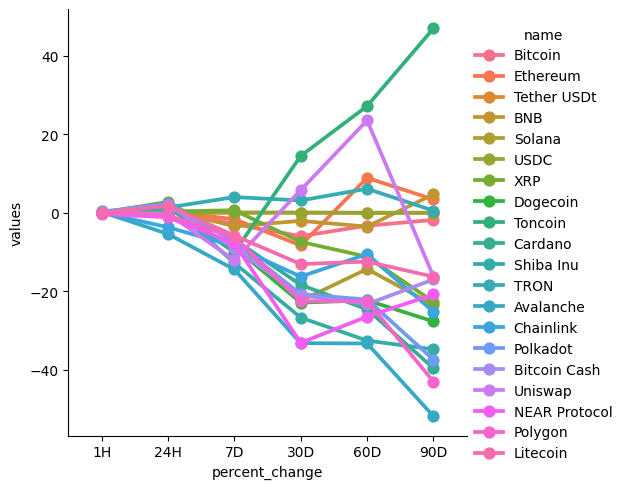

In [118]:
sns.catplot(x='percent_change', y='values', hue='name', data=df5, kind='point')

In [119]:
df5.to_csv('crypto2.csv')

specific crypto

In [121]:
df6=df_test[['name','quote.USD.price','timestamp']]
df7=df6.query("name =='Bitcoin'")
df7

name  quote.USD.price                   timestamp
0     Bitcoin      64292.78366  2024-06-22 12:15:07.907110
20    Bitcoin      64300.89445  2024-06-22 12:16:09.399649
40    Bitcoin      64300.89445  2024-06-22 12:17:11.009237
60    Bitcoin      64315.12497  2024-06-22 12:18:13.063109
80    Bitcoin      64334.11906  2024-06-22 12:19:14.570868
...       ...              ...                         ...
5500  Bitcoin      64387.13978  2024-06-23 11:22:01.615135
5520  Bitcoin      64379.22246  2024-06-23 11:51:42.805531
5540  Bitcoin      64373.61416  2024-06-23 11:52:44.237357
5560  Bitcoin      64373.61416  2024-06-23 11:53:45.622142
5580  Bitcoin      64375.48691  2024-06-23 11:57:28.033198

[280 rows x 3 columns]

<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

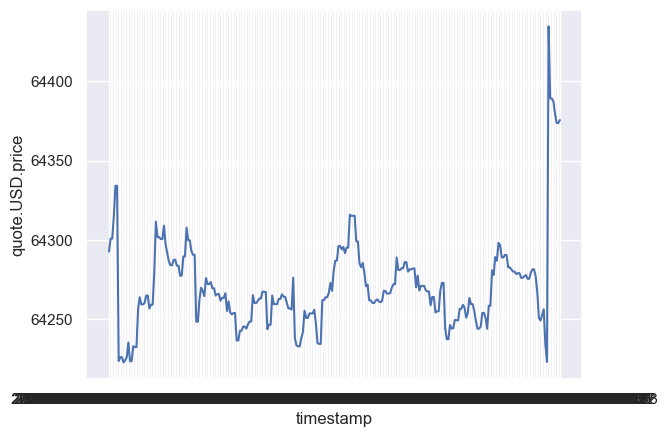

In [125]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data=df7)

In [128]:
df8=df5.query("name =='Bitcoin'")
df8

name percent_change   values
0  Bitcoin             1H  0.00029
1  Bitcoin            24H  0.85226
2  Bitcoin             7D -2.92699
3  Bitcoin            30D -5.98222
4  Bitcoin            60D -3.31536
5  Bitcoin            90D -1.84915

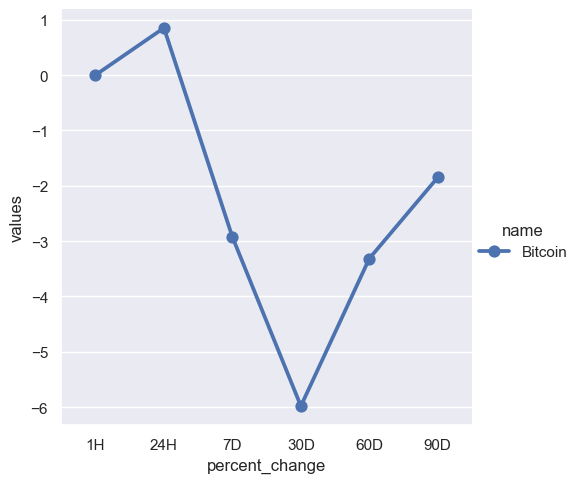

In [129]:
sns.catplot(x='percent_change', y='values', hue='name', data=df8, kind='point')